Dimensionality reduction on Constant Maturity Treasury Data and comparison to 2019.

In [53]:
# Import statements

from fredapi import Fred
import pandas as pd
import scipy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

# Part 1: Data retrieval

In [54]:
# Use Fred api to get all data series

fred = Fred(api_key='7c047f04cfe60a0f41a64fe21f8d9ec4')
GS1 = fred.get_series('GS1')
GS2 = fred.get_series('GS2')
GS3 = fred.get_series('GS3')
GS5 = fred.get_series('GS5')
GS7 = fred.get_series('GS7')
GS10 = fred.get_series('GS10')

# Exploratory Data Analysis

Inspection of the data series from the fred API

In [55]:
print('GS1')
print(GS1.head())

GS1
1953-04-01    2.36
1953-05-01    2.48
1953-06-01    2.45
1953-07-01    2.38
1953-08-01    2.28
dtype: float64


In [56]:
print('GS2')
print(GS2.head())

GS2
1976-06-01    7.06
1976-07-01    6.85
1976-08-01    6.63
1976-09-01    6.42
1976-10-01    5.98
dtype: float64


In [57]:
print('GS3')
print(GS3.head())

GS3
1953-04-01    2.51
1953-05-01    2.72
1953-06-01    2.74
1953-07-01    2.62
1953-08-01    2.58
dtype: float64


In [58]:
print('GS5')
print(GS5.head())

GS5
1953-04-01    2.62
1953-05-01    2.87
1953-06-01    2.94
1953-07-01    2.75
1953-08-01    2.80
dtype: float64


In [59]:
print('GS7')
print(GS7.head())

GS7
1969-07-01    6.80
1969-08-01    6.79
1969-09-01    7.36
1969-10-01    7.24
1969-11-01    7.17
dtype: float64


In [60]:
print('GS10 start')
print(GS10.head())
print('\nEnd')
print(GS10.tail())

GS10 start
1953-04-01    2.83
1953-05-01    3.05
1953-06-01    3.11
1953-07-01    2.93
1953-08-01    2.95
dtype: float64

End
2019-07-01    2.06
2019-08-01    1.63
2019-09-01    1.70
2019-10-01    1.71
2019-11-01    1.81
dtype: float64


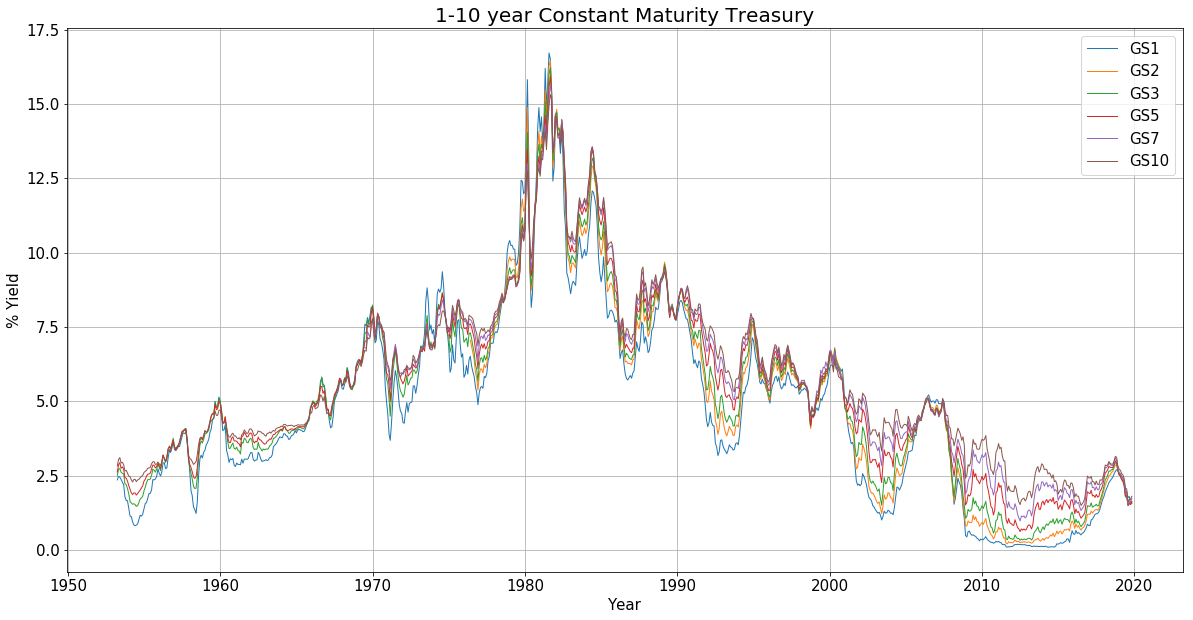

In [61]:
# Plot all data on the same graph

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(GS1, label = 'GS1', linewidth = 1)
ax.plot(GS2, label = 'GS2', linewidth = 1)
ax.plot(GS3, label = 'GS3', linewidth = 1)
ax.plot(GS5, label = 'GS5', linewidth = 1)
ax.plot(GS7, label = 'GS7', linewidth = 1)
ax.plot(GS10, label = 'GS10', linewidth = 1)

ax.legend(loc = "center right")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('% Yield', fontsize = 15)
ax.tick_params(labelsize = 15)
ax.legend(fontsize = 15)
ax.set_title('1-10 year Constant Maturity Treasury', fontsize = 20)

plt.grid()
plt.savefig("tot_data.png")
plt.show()


The combined 6 data series plotted over time. All data series show strong correlation with increasing N year treasury data generally increasing in % yield.  

In [62]:
# Combine all data into same dataframe for Dimension Reduction

tot_df = pd.concat([GS1, GS2, GS3, GS5, GS7, GS10], axis=1)
tot_df.columns = ['GS1', 'GS2', 'GS3', 'GS5', 'GS7', 'GS10']
tot_df.head()

,GS1,GS2,GS3,GS5,GS7,GS10
1953-04-01,2.36,NaN,2.51,2.62,NaN,2.83
1953-05-01,2.48,NaN,2.72,2.87,NaN,3.05
1953-06-01,2.45,NaN,2.74,2.94,NaN,3.11
1953-07-01,2.38,NaN,2.62,2.75,NaN,2.93
1953-08-01,2.28,NaN,2.58,2.80,NaN,2.95


In [63]:
tot_df.tail()

,GS1,GS2,GS3,GS5,GS7,GS10
2019-07-01,1.96,1.84,1.80,1.83,1.93,2.06
2019-08-01,1.77,1.57,1.51,1.49,1.55,1.63
2019-09-01,1.80,1.65,1.59,1.57,1.64,1.70
2019-10-01,1.61,1.55,1.53,1.53,1.62,1.71
2019-11-01,1.57,1.61,1.61,1.64,1.74,1.81


# Part 2: Dimensionality Reduction

In [64]:
# Perform PCA on dataset using 3 components

pca = PCA(n_components = 3)
clean = tot_df.dropna()
pca_prin_comps = pca.fit_transform(clean)

print('\nPCA Components')
print(pca.components_)
print('\nExplained variance from each components')
print(pca.explained_variance_)
print('\nExplained variance ratio')
print(pca.explained_variance_ratio_)


PCA Components
[[0.4332 0.4321 0.4220 0.4023 0.3864 0.3693]
 [0.6433 0.3003 0.0776 -0.2292 -0.3994 -0.5272]
 [0.5531 -0.2878 -0.5129 -0.2556 0.0201 0.5314]]

Explained variance from each components
[75.3164 0.7514 0.0380]

Explained variance ratio
[0.9896 0.0099 0.0005]


In [65]:
# Put results into dataframe

prin_comps_df = pd.DataFrame(pca_prin_comps)
pca_results =  pd.concat([prin_comps_df, pd.DataFrame(clean.index)],axis = 1)
pca_results.columns = ['principal component 1', 'principal component 2', 'principal component 3', 'date']
pca_results.set_index('date', inplace = True)
pca_results.head()

,principal component 1,principal component 2,principal component 3
date,,,
1976-06-01,4.208438,-0.300061,-0.169967
1976-07-01,3.820208,-0.520438,-0.175344
1976-08-01,3.387840,-0.614526,-0.077582
1976-09-01,2.938809,-0.591995,-0.056127
1976-10-01,2.108202,-0.693607,0.094318


Plot PCA components along the time series to see how much they vary with the general times

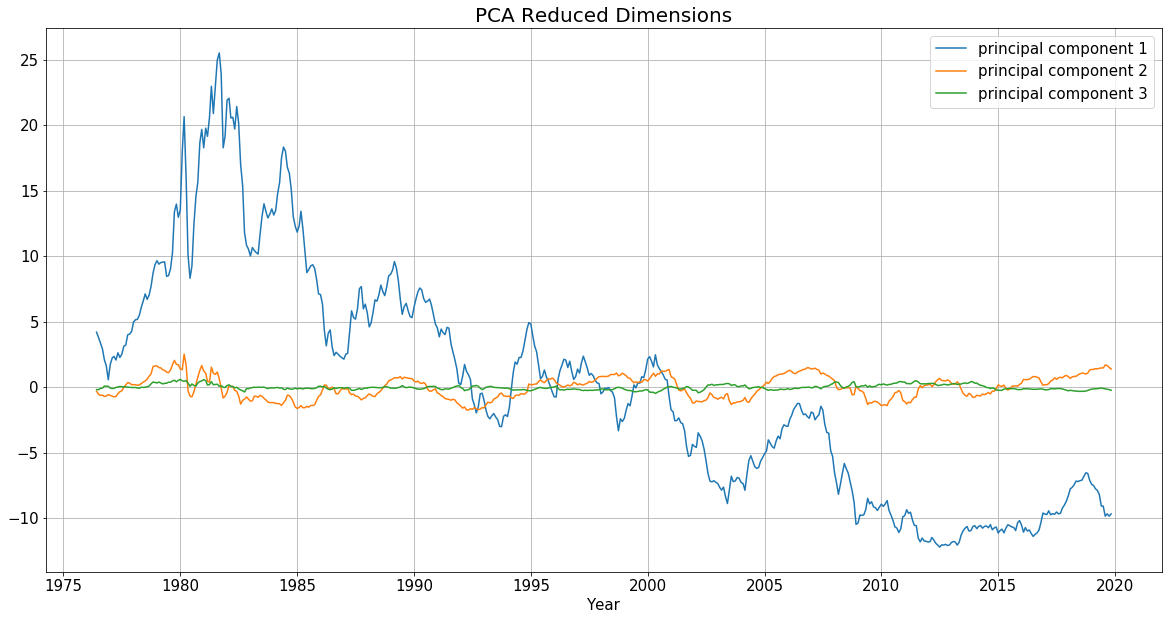

In [66]:
# Plotting PCA 3 components over time, note that pca is performed on dates which we have all data for (from 1977 onwards)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Year', fontsize = 15)
ax.set_title('PCA Reduced Dimensions', fontsize = 20)
ax.plot(pca_results['principal component 1'])
ax.plot(pca_results['principal component 2'])
ax.plot(pca_results['principal component 3'])
ax.legend(fontsize = 15)
ax.tick_params(labelsize = 15)

ax.grid()
plt.savefig("reduced_dimensions.png")

Plot of 3 reduced dimensions of PCA over time. The first principal component follows a similar trend to that of the 6 data series in the first plot. The y-axis values are not meaningful, the principal components are centered around 0

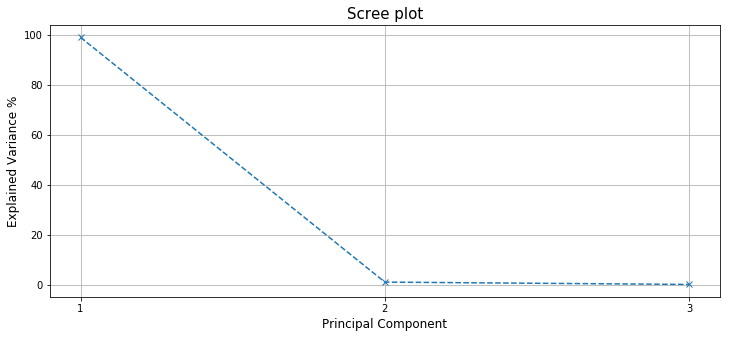

In [67]:
# Scree plot showing the explained variance proportion in each principal component

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1) 

ax.plot([1,2,3],pca.explained_variance_ratio_ * 100, "--x")
ax.set_xlabel('Principal Component', fontsize = 12)
ax.set_ylabel('Explained Variance %', fontsize = 12)
ax.set_title('Scree plot', fontsize = 15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()
plt.savefig("scree_plot.png")

Scree plot shows the principal component explains most of the variation, the next component explains approx 1% of variation

In [68]:
# To get the stability of reduced dimensions over time, PCA is done on rolling time segments of a year
# As the data is not complete for all constant maturity rates, PCA is done on all timeseries data available

column_names = ['PC1', 'PC2', 'PC3']
tot_variance_ratios = pd.DataFrame()
n_months = 9

for i in range(n_months,len(tot_df)-n_months):
    prin_comps_iter = pca.fit_transform(tot_df.iloc[i-n_months:i+n_months].dropna(axis=1))
    line_i = pd.DataFrame(data = [pca.explained_variance_ratio_], columns = column_names, index = [i-n_months])
    tot_variance_ratios = tot_variance_ratios.append(line_i)
    
tot_shortened = tot_df[n_months:len(tot_df)-n_months]
tot_variance_results =  pd.concat([tot_variance_ratios, pd.DataFrame(tot_shortened.index)],axis = 1)
tot_variance_results.columns = ['principal component 1', 'principal component 2', 'principal component 3', 'date']
tot_variance_results.set_index('date', inplace = True)

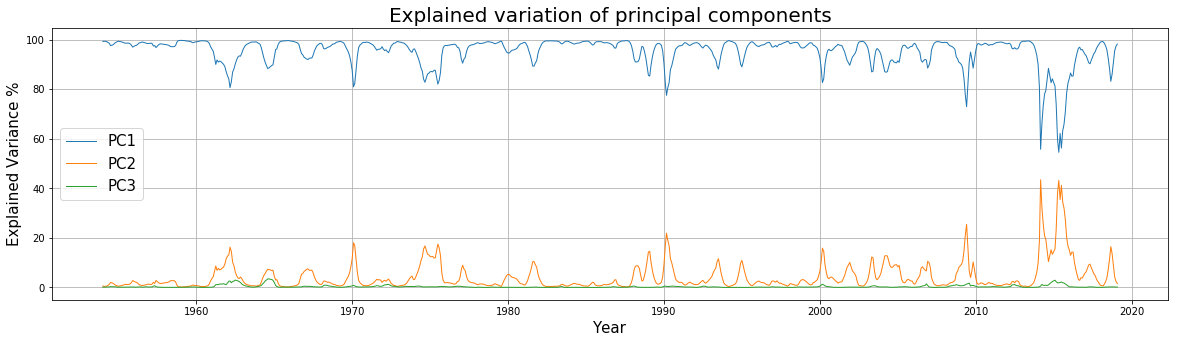

In [69]:
# Plot the explained variation for the first 3 principal components over time

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1) 
ax.plot(tot_variance_results * 100, linewidth = 1)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Explained Variance %', fontsize = 15)
ax.set_title('Explained variation of principal components', fontsize = 20)
ax.legend(labels = column_names, loc = 'center left', fontsize = 15)
plt.grid()
plt.savefig("variation_proportion.png")

# Comparing similarity between 2019 and all other years

In [70]:
# Using the absolute value difference between each month for all months up to November of 1st Principal Component data
# Starting at 1977 which is the earilest financial year we have data for all 6 constant maturity treasury data series

avg_euc_diff = pd.DataFrame()
for year in range(1977,2019):
    this_year_diff = 0
    
    for i in range(1,11):
        this_year_diff += abs(pca_results.loc[str(year) + '-' + str(i)].iloc[0][0]-pca_results.loc['2019' + '-' + str(i)].iloc[0][0])
    
    this_year_line = pd.DataFrame(data = [this_year_diff/11], columns = ['Avg Diff'], index = [year])
    avg_euc_diff = avg_euc_diff.append(this_year_line)

print(avg_euc_diff.head())

       Avg Diff
1977  10.213911
1978  13.475305
1979  16.681843
1980  20.422101
1981  27.738362


In [71]:
print(avg_euc_diff.min())
print(avg_euc_diff.idxmin())

Avg Diff    0.941381
dtype: float64
Avg Diff    2003
dtype: int64


Using the average euclidian distance as the measure of similarity, 2003 is the most similar year to 2019

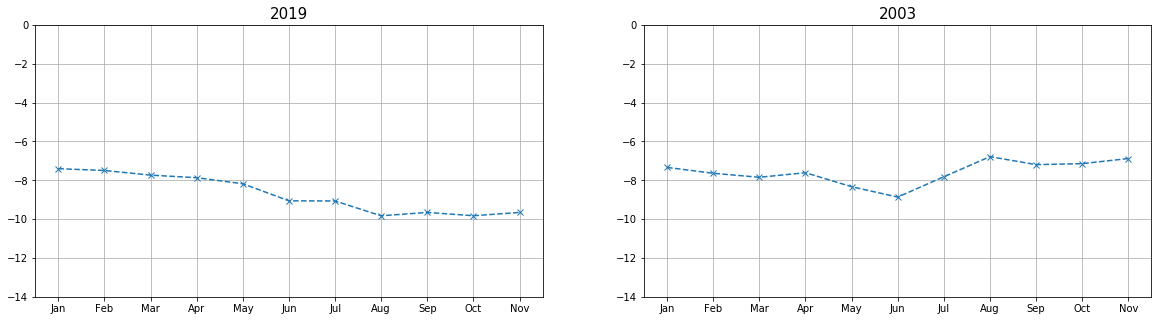

In [72]:
# Plot 1st principal component most similar historical year to 2019

pc1_2003 = pca_results.loc['2003-01':'2003-11']['principal component 1']
pc1_2019 = pca_results.loc['2019']['principal component 1']
pc1_2003.index = pc1_2003.index.strftime('%b')
pc1_2019.index = pc1_2019.index.strftime('%b')

fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(pc1_2019, '--x')
ax[1].plot(pc1_2003, '--x')
ax[0].set_title('2019', fontsize = 15)
ax[1].set_title('2003', fontsize = 15)

plt.setp(ax, ylim = (-14,-0))
ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)

ax[0].grid()
ax[1].grid()
plt.savefig("2019_2003.png")
plt.show()

The principal component for 2019 and 2003 compared

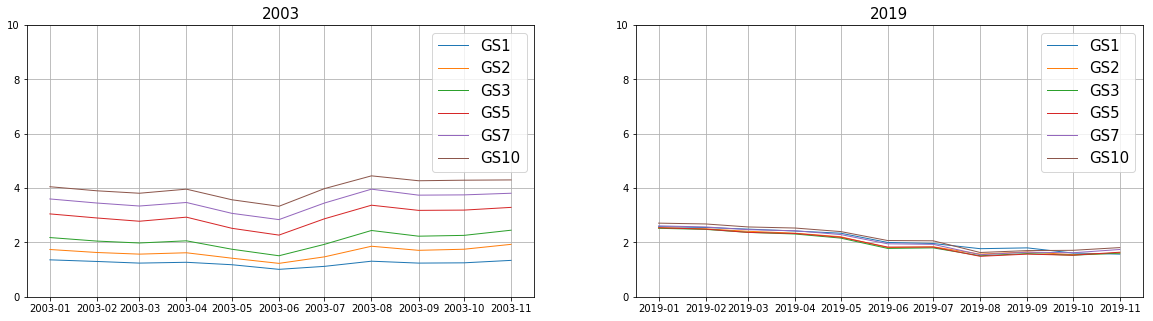

In [73]:
# Plot all data on the same graph

fig, ax = plt.subplots(1,2, figsize = (20,5))

ax[0].set_title('2003', fontsize = 15)
ax[1].set_title('2019', fontsize = 15)

ax[0].plot(GS1.loc['2003-01':'2003-11'], label = 'GS1', linewidth = 1)
ax[0].plot(GS2.loc['2003-01':'2003-11'], label = 'GS2', linewidth = 1)
ax[0].plot(GS3.loc['2003-01':'2003-11'], label = 'GS3', linewidth = 1)
ax[0].plot(GS5.loc['2003-01':'2003-11'], label = 'GS5', linewidth = 1)
ax[0].plot(GS7.loc['2003-01':'2003-11'], label = 'GS7', linewidth = 1)
ax[0].plot(GS10.loc['2003-01':'2003-11'], label = 'GS10', linewidth = 1)

ax[1].plot(GS1.loc['2019'], label = 'GS1', linewidth = 1)
ax[1].plot(GS2.loc['2019'], label = 'GS2', linewidth = 1)
ax[1].plot(GS3.loc['2019'], label = 'GS3', linewidth = 1)
ax[1].plot(GS5.loc['2019'], label = 'GS5', linewidth = 1)
ax[1].plot(GS7.loc['2019'], label = 'GS7', linewidth = 1)
ax[1].plot(GS10.loc['2019'], label = 'GS10', linewidth = 1)

ax[0].legend(fontsize = 15)
ax[1].legend(fontsize = 15)
plt.setp(ax[0], ylim = (0,10))
plt.setp(ax[1], ylim = (0,10))

ax[0].grid()
ax[1].grid()
plt.savefig("2003_2019_raw.png")
plt.show()

The actual 6 data series for 2003 and 2019

In [74]:
# Additional check for data pre 1977 with fewer data series
# Do PCA on all data going back to 1953

no_GS2 = tot_df.drop(['GS2'], axis = 1).dropna()
no_GS7 = tot_df.drop(['GS7'], axis = 1).dropna()
no_GS2_GS7 = tot_df.drop(['GS2', 'GS7'], axis = 1).dropna()

no_GS2_pca = pca.fit_transform(no_GS2)
no_GS7_pca = pca.fit_transform(no_GS7)
no_GS2_GS7_pca = pca.fit_transform(no_GS2_GS7)

no_GS2_df = pd.DataFrame(no_GS2_pca)
no_GS7_df = pd.DataFrame(no_GS7_pca)
no_GS2_GS7_df = pd.DataFrame(no_GS2_GS7_pca)

In [75]:
# Putting the results in a dataframe

no_GS2_results =  pd.concat([no_GS2_df, pd.DataFrame(no_GS2.index)], axis = 1)
no_GS2_results.columns = ['principal component 1', 'principal component 2', 'principal component 3', 'date']
no_GS2_results.set_index('date', inplace = True)

no_GS7_results =  pd.concat([no_GS7_df, pd.DataFrame(no_GS7.index)], axis = 1)
no_GS7_results.columns = ['principal component 1', 'principal component 2', 'principal component 3', 'date']
no_GS7_results.set_index('date', inplace = True)

no_GS2_GS7_results =  pd.concat([no_GS2_GS7_df, pd.DataFrame(no_GS2_GS7.index)], axis = 1)
no_GS2_GS7_results.columns = ['principal component 1', 'principal component 2', 'principal component 3', 'date']
no_GS2_GS7_results.set_index('date', inplace = True)

In [76]:
# Use the absolute value difference between each month for all months up to November

sum_abs_diff_all = pd.DataFrame()
for year in range(1954,2019):
    this_year_diff = 0

    for i in range(1,11):
        this_year_diff += abs(no_GS2_GS7_results.loc[str(year) + '-' + str(i)].iloc[0][0]-no_GS2_GS7_results.loc['2019' + '-' + str(i)].iloc[0][0])/11
    
    this_year_line = pd.DataFrame(data = [this_year_diff/11], columns = ['Absolute Diff'], index = [year])
    sum_abs_diff_all = sum_abs_diff_all.append(this_year_line)

In [77]:
print(sum_abs_diff_all.min())
print(sum_abs_diff_all.idxmin())

Absolute Diff    0.069543
dtype: float64
Absolute Diff    2003
dtype: int64


This produces the same result as before so we can conclude that 2003 is the most similar year to 2019 